# Exploratory Data Analysis

In [33]:
#importing relevant packages
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_01_packages.py

In [34]:
# import useful functions
%run /Users/thomasadler/Desktop/futuristic-platipus/notebooks/ta_02_functions.py

In [35]:
#defining working directory
filepath = '/Users/thomasadler/Desktop/capstone_docs/'

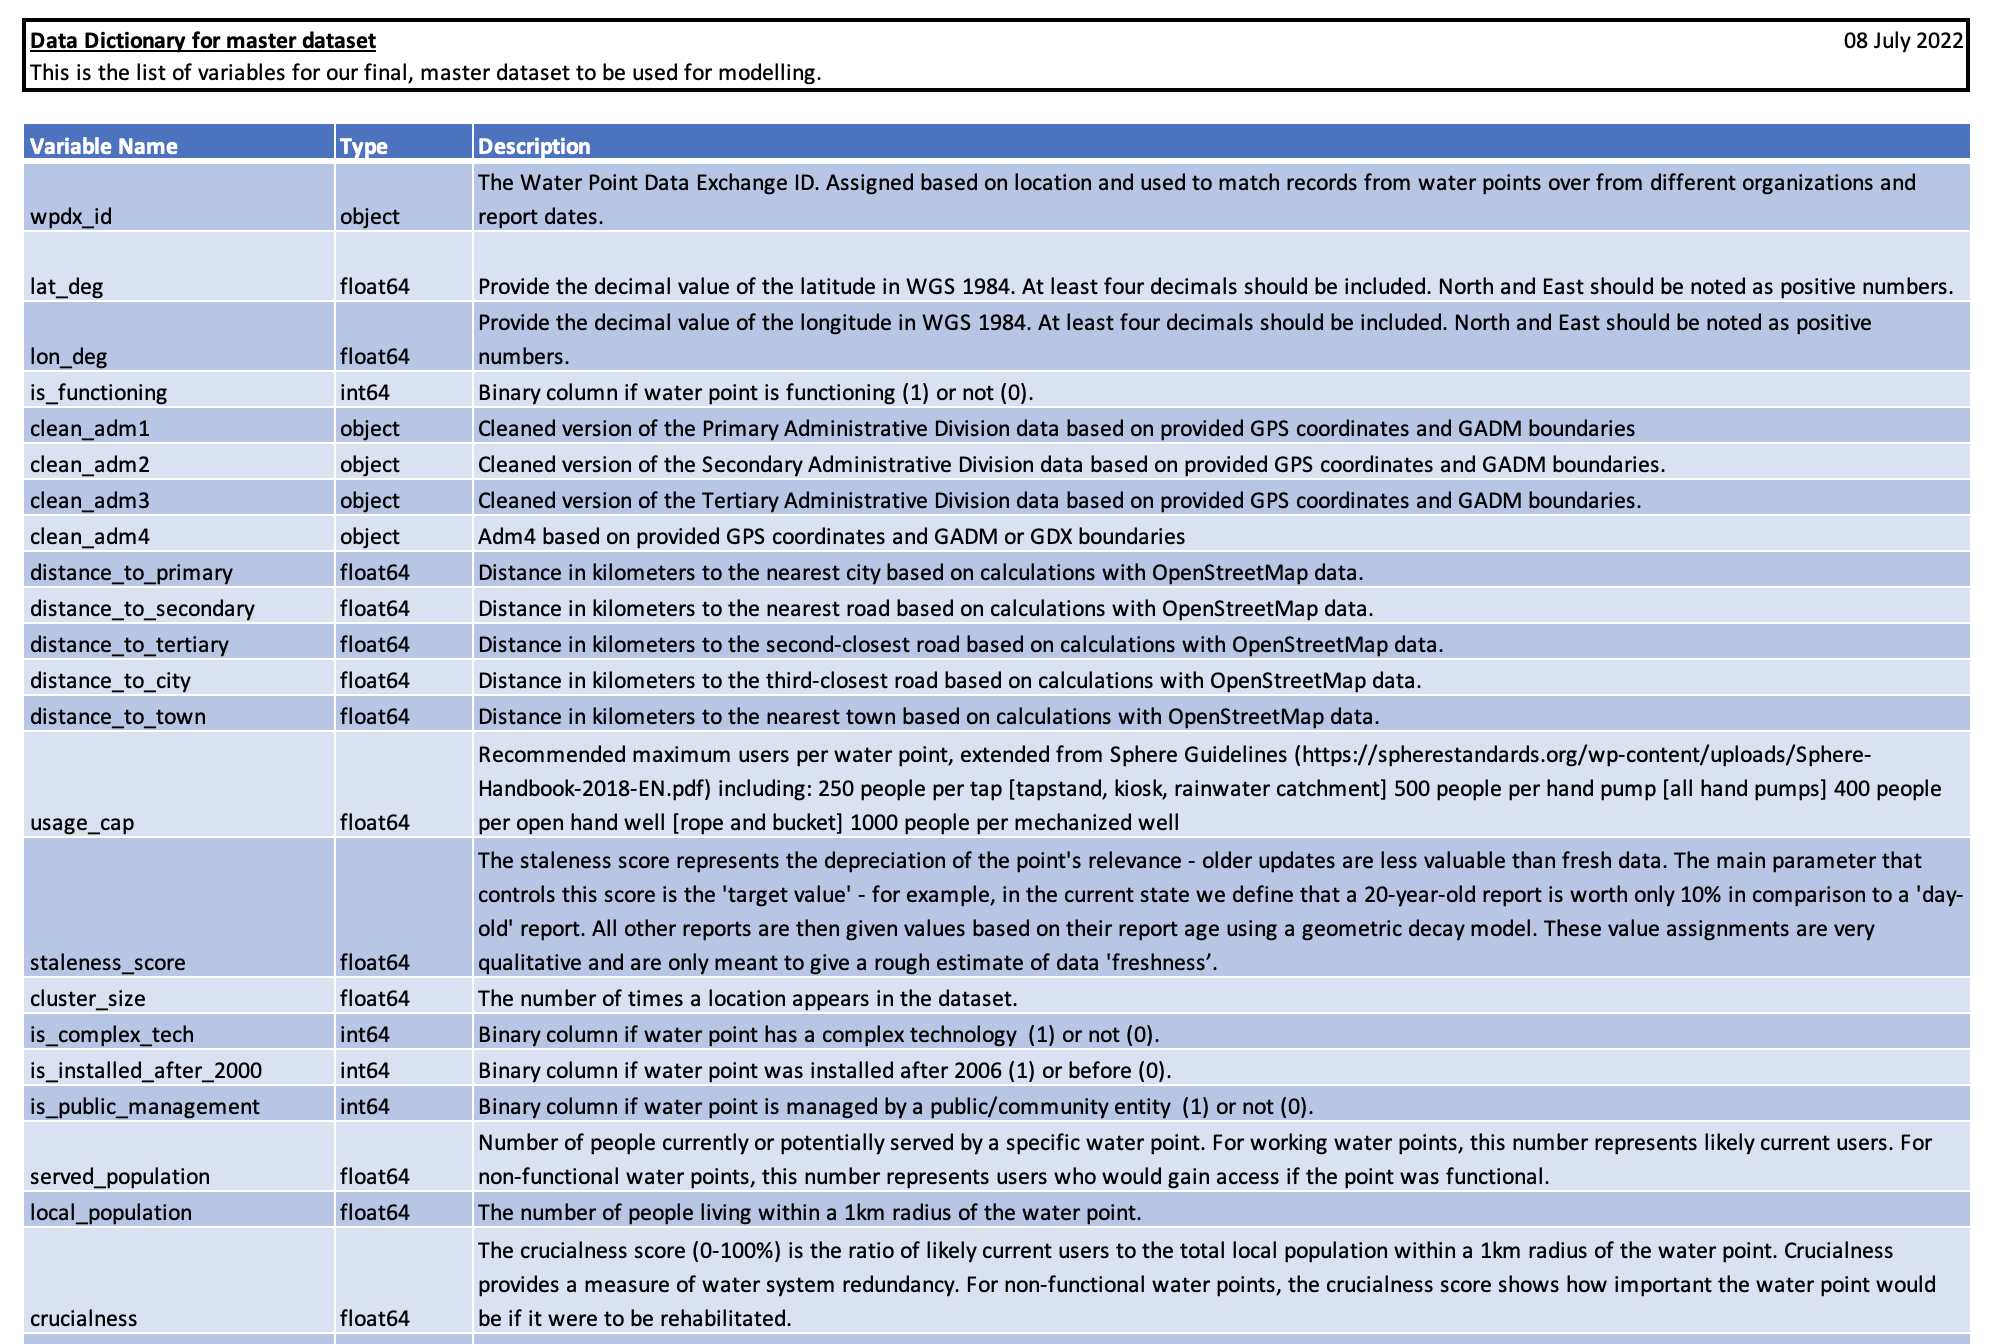

In [36]:
#data dictionary part A
Image("/Users/thomasadler/Desktop/futuristic-platipus/data_dictionary/4A-Master-Dictionary.png")

In [ ]:
#data dictionary part B
Image("/Users/thomasadler/Desktop/futuristic-platipus/data_dictionary/4B-Master-Dictionary.png")

Now we have a clean dataset, with no duplicate rows/columns, no missing values, all of our columns of interest and all of them in a format fit for analysis. Our outcome (dependent) variable is whether a water point is functioning or not. `is_functioning` is a binary column equal to 1 if that water point was functioning at the time of check, 0 if not.

In [37]:
#water points
master_df_raw=pd.read_csv(filepath + 'master_df.csv')

#leaving raw dataset untouched

master_df=master_df_raw.copy()

#check
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106538 entries, 0 to 106537
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                106538 non-null  int64  
 1   wpdx_id                   105723 non-null  object 
 2   lat_deg                   106538 non-null  float64
 3   lon_deg                   106538 non-null  float64
 4   is_functioning            106538 non-null  int64  
 5   clean_adm1                106538 non-null  object 
 6   clean_adm2                106538 non-null  object 
 7   clean_adm3                106538 non-null  object 
 8   clean_adm4                106538 non-null  object 
 9   distance_to_primary       106538 non-null  float64
 10  distance_to_secondary     106538 non-null  float64
 11  distance_to_tertiary      106538 non-null  float64
 12  distance_to_city          106538 non-null  float64
 13  distance_to_town          106538 non-null  f

We will go through every column, and understand the information it contains and how we can use it in our models.

# 1. wpdx_id

In [ ]:
#unique water points
unique_water=len(set(master_df['wpdx_id']))
total_observations=len(master_df['wpdx_id'])

print(f"There are {unique_water} unique water points in the dataset")
print(f"There are {total_observations} reports in the dataset")
print(f"There are {total_observations-unique_water} water points with more than one report")

In [ ]:
#reports by water point
reports_water_pt=master_df[['wpdx_id','clean_adm1' ]].groupby('wpdx_id').count()

#visualise
sns.histplot(reports_water_pt, legend=False)
plt.title("Majority of water points have only been checked once")
plt.xlabel("Number of reports")
plt.show()

# 2-3. lat_deg & lon_deg

In [ ]:
#location of all water points
water_points=master_df.groupby('wpdx_id').mean()

In [ ]:
#visualise water points, choose what variable represents the size of the points
fig = px.scatter_geo(
    water_points,
    lon='lon_deg', lat='lat_deg', 
    size='served_population', #'crucialness', 'pressure', 'total_fatalities_adm4', 'total_events_adm4 
    height=600,
    width=800,
)

fig.show()

# 4. is_functioning

In [43]:
#functioning water points
master_df['is_functioning'].value_counts(normalize=True)*100

1    80.364752
0    19.635248
Name: is_functioning, dtype: float64

In [58]:
#functioning water points by adm1
adm1_functioning=master_df[['clean_adm1','is_functioning']].groupby('clean_adm1').mean()*100

#visualise
fig = px.bar(adm1_functioning, x=adm1_functioning.index, y="is_functioning", title="Most adm1 regions have 3/4 of water points functioning")
fig.show()

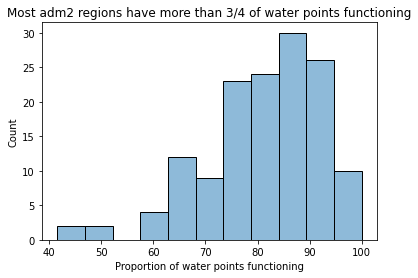

In [59]:
#functioning water points by adm2
adm2_functioning=master_df[['clean_adm2','is_functioning']].groupby('clean_adm2').mean()*100

#visualise
sns.histplot(adm2_functioning, legend=False)
plt.title("Most adm2 regions have more than 3/4 of water points functioning")
plt.xlabel("Proportion of water points functioning")
plt.show()

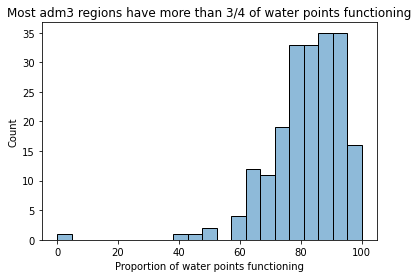

In [61]:
#functioning water points by adm3
adm3_functioning=master_df[['clean_adm3','is_functioning']].groupby('clean_adm3').mean()*100

#visualise
sns.histplot(adm3_functioning, legend=False)
plt.title("Most adm3 regions have more than 3/4 of water points functioning")
plt.xlabel("Proportion of water points functioning")
plt.show()

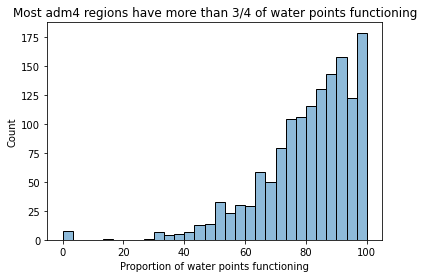

In [62]:
#functioning water points by adm4
adm4_functioning=master_df[['clean_adm4','is_functioning']].groupby('clean_adm4').mean()*100

#visualise
sns.histplot(adm4_functioning, legend=False)
plt.title("Most adm4 regions have more than 3/4 of water points functioning")
plt.xlabel("Proportion of water points functioning")
plt.show()

# 5-8 clean_adm1/2/3/4

extra is functioning with others..